# Bonus-Track Assignment 2: Sequential MNIST classification task
Note: as a reference for keras tuner I used the documentation: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [516]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten
import keras_tuner as kt
from keras.datasets import mnist
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

## Load the dataset

In [517]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Plot the first digits

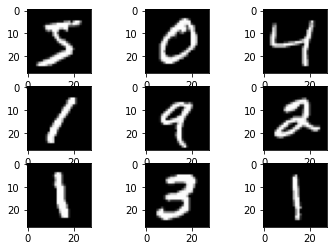

[5 0 4 1 9 2 1 3 1 4]


In [518]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

print(train_y[:10])


In [519]:
# encode class values as integers

# convert integers to one hot encoded
y_train = tf.one_hot(train_y, depth=10)

y_test = tf.one_hot(test_y, depth=10)



flatten the input images into vectors

784


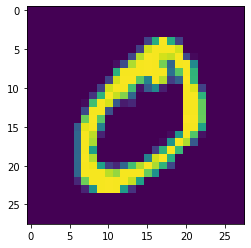

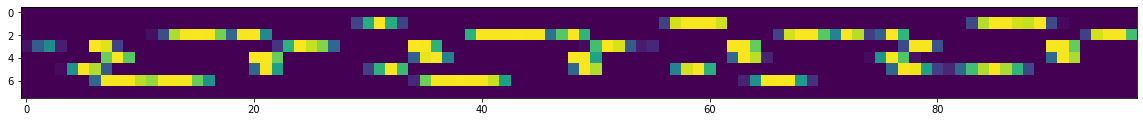

In [520]:
x_train = train_X.reshape(train_X.shape[0], -1)
x_test = test_X.reshape(test_X.shape[0], -1)
print(x_train.shape[1])

n = 1
x = train_X[n]
plt.imshow(x)
plt.show()
plt.figure(figsize = (20,15))
xx = (x_train[n]).reshape(8, int(len(x_train[n])/8))
plt.imshow(xx)




In [521]:
#reshape the data to feed the RNN
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
Y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
Y_train = y_train
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
Y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))
Y_test = y_test
#check the shapes
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784, 1)
(60000, 10)
(10000, 784, 1)
(10000, 10)


### Create the model
To do model selection, we actually create the "hypermodel", defining the hyperparameter search space as well as the architecture of the model.

In [522]:
def create_model(hidden_units,dense_units):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=(100,784,1),
                        activation='tanh', return_sequences=True, stateful = True, batch_input_shape=(100,784,1))) #stateful = True
    model.add(Flatten()),
    model.add(Dense(units=dense_units, activation='softmax'))

    learning_rate = 0.01
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [523]:
model = create_model(28, 10)
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_50 (SimpleRNN)   (100, 784, 28)            840       
                                                                 
 flatten_14 (Flatten)        (100, 21952)              0         
                                                                 
 dense_57 (Dense)            (100, 10)                 219530    
                                                                 
Total params: 220,370
Trainable params: 220,370
Non-trainable params: 0
_________________________________________________________________


In [524]:
p = np.reshape(X_train[0], (1,784,1))
print(p.shape)

(1, 784, 1)


In [525]:
model.predict(p)

1/1 [==============================] - 0s 166ms/step


array([[0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856 , 0.04855139, 0.14001179,
        0.06632037, 0.06719331, 0.0421546 , 0.19393234, 0.31205162],
       [0.04088797, 0.04691105, 0.0419856

In [526]:
#model.evaluate(X_train[0])
history = model.fit(X_train, Y_train,batch_size = 100,validation_split= 0.2, epochs = 10).history


Epoch 1/10
480/480 [==============================] - 64s 132ms/step - loss: 0.3807 - accuracy: 0.8936 - val_loss: 0.3379 - val_accuracy: 0.9102
Epoch 2/10
480/480 [==============================] - 64s 134ms/step - loss: 0.2438 - accuracy: 0.9320 - val_loss: 0.2197 - val_accuracy: 0.9439
Epoch 3/10
480/480 [==============================] - 62s 129ms/step - loss: 0.2210 - accuracy: 0.9419 - val_loss: 0.2443 - val_accuracy: 0.9461
Epoch 4/10
480/480 [==============================] - 69s 144ms/step - loss: 0.1695 - accuracy: 0.9529 - val_loss: 0.2517 - val_accuracy: 0.9401
Epoch 5/10
480/480 [==============================] - 106s 221ms/step - loss: 0.1548 - accuracy: 0.9562 - val_loss: 0.2545 - val_accuracy: 0.9462
Epoch 6/10
480/480 [==============================] - 101s 209ms/step - loss: 0.1477 - accuracy: 0.9592 - val_loss: 0.2648 - val_accuracy: 0.9481
Epoch 7/10
480/480 [==============================] - 101s 210ms/step - loss: 0.1540 - accuracy: 0.9601 - val_loss: 0.2586 - val

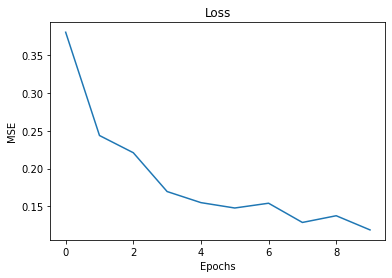

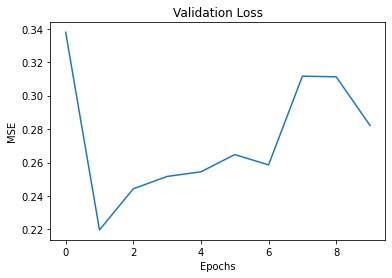

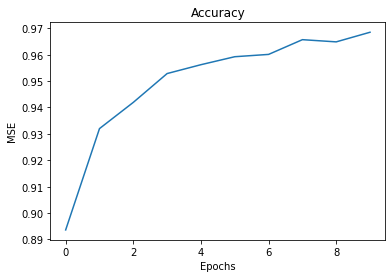

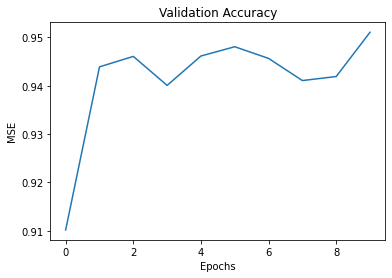

In [528]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

### Plots of target and output signals over time

In [533]:
scores = model.evaluate(X_test, Y_test,batch_size = 100, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.97%
